<a href="https://colab.research.google.com/github/DanielDjan/Sea-Land-Website-with-AI/blob/main/KNN_Sea_Land.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

קריאת כל קבצי התמונות בספריית data

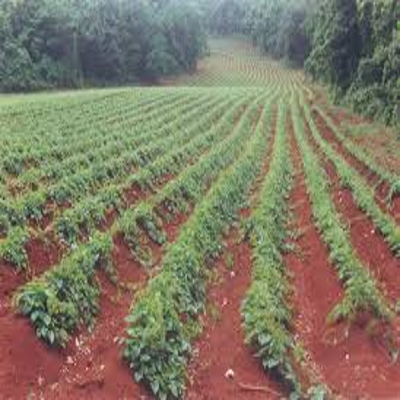

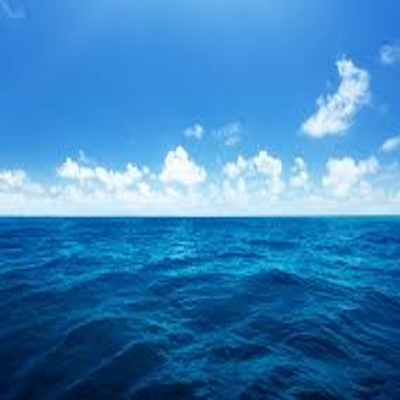

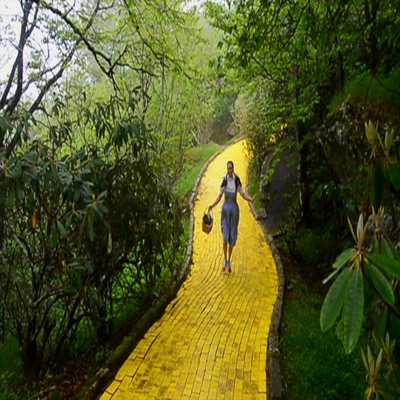

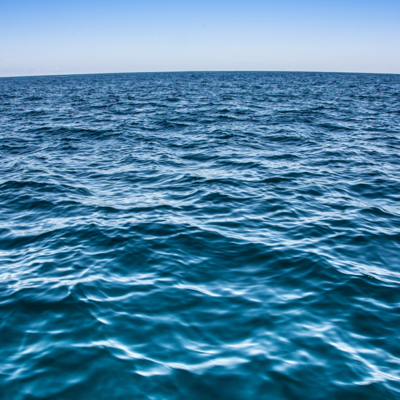

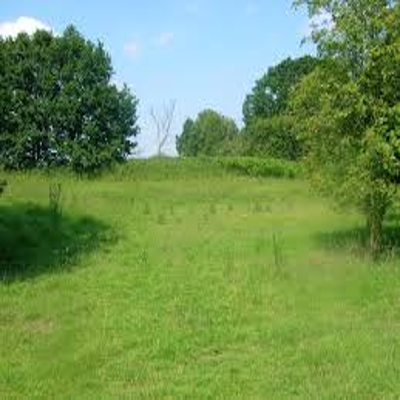

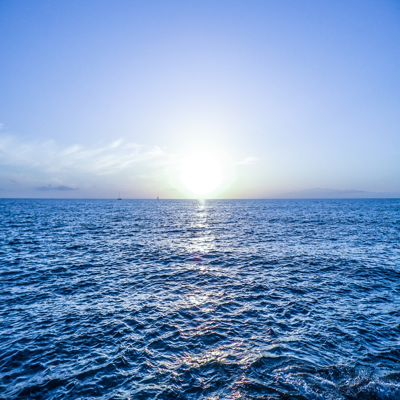

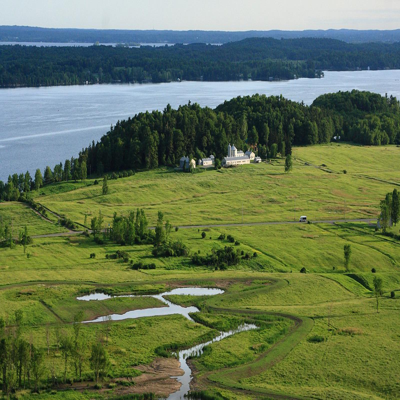

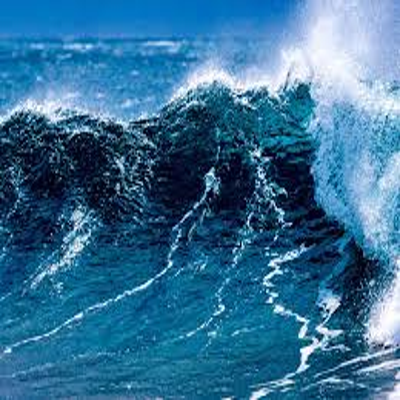

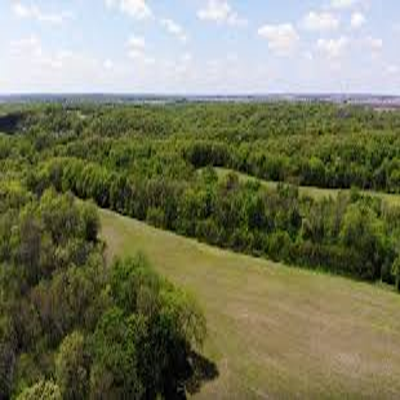

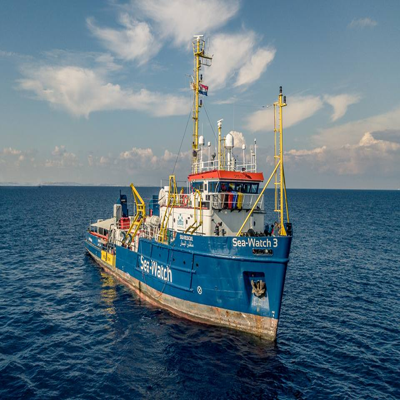

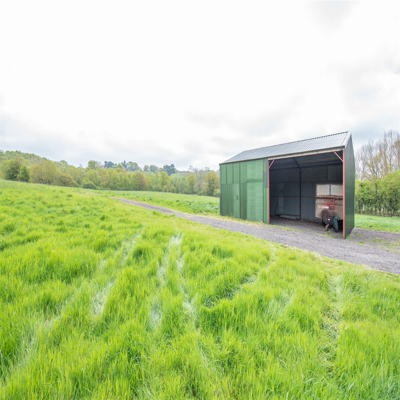

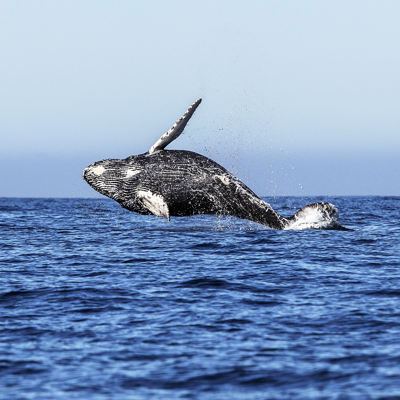

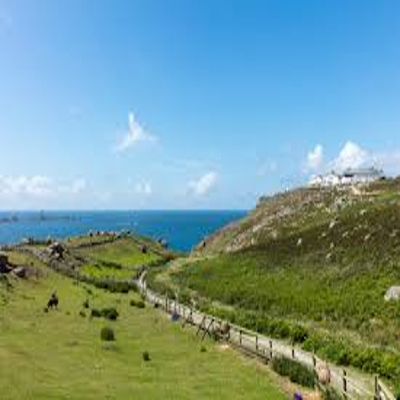

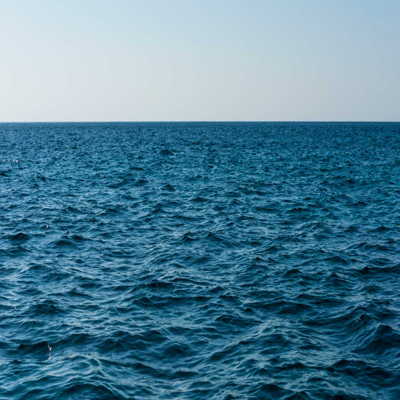

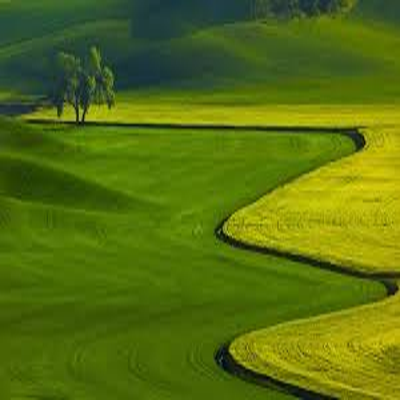

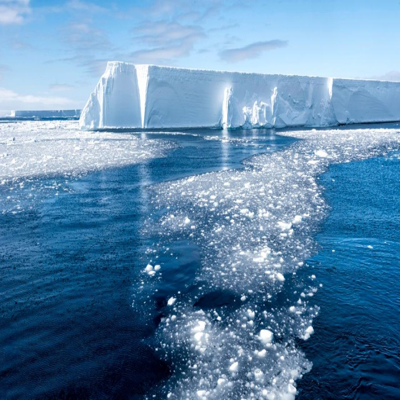

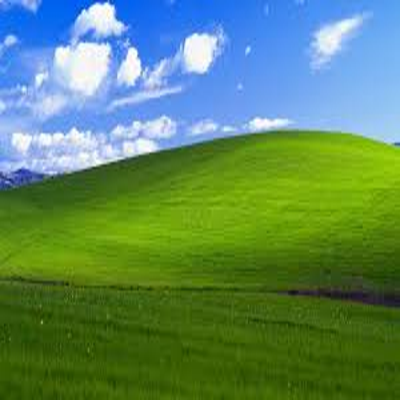

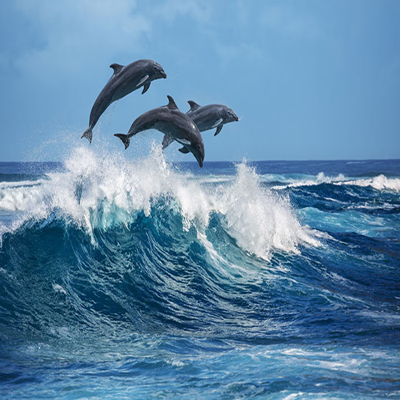

In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from IPython.display import display
path = "/content/drive/MyDrive/data/"
size = (400, 400)
for i in range(9):
    land_img_path = path + "land" + str(i) + ".jpg"
    sea_img_path = path + "sea" + str(i) + ".jpg"
    land_img = Image.open(land_img_path).resize(size)
    sea_img = Image.open(sea_img_path).resize(size)
    display(land_img)
    display(sea_img)

המרה של כל תמונה למערך numpy

In [ ]:
path2 = "/content/drive/MyDrive/test/"
avg = np.zeros((6, 3))
for i in range(6):
    test = Image.open(path2 + "test" + str(i) + ".jpg")
    arr = np.asarray(test)
    for j in range(3):
        values = arr[:, :, j]
        avg2 = np.mean(values)
        avg[i, j] = avg2
avg

array([[ 73.16514127, 101.40009948, 133.04162356],
       [115.97088636, 142.22322273,  70.25658182],
       [112.16769658, 184.54570305, 228.31970038],
       [125.35892697, 133.08846498, 105.62144064],
       [137.92963095, 155.4776512 ,  96.15760848],
       [114.17206632, 132.79631621,  86.55477991]])

ממוצע של כל אחת משכבות הצבע בכל תמונה, שתי רשימות שבכל אחת 9 שלשות

In [ ]:
land_averages = []
sea_averages = []
for i in range(9):
    land_img_path = path + "land" + str(i) + ".jpg"
    sea_img_path = path + "sea" + str(i) + ".jpg"
    land_img = Image.open(land_img_path).resize(size)
    sea_img = Image.open(sea_img_path).resize(size)
    land_avg = np.mean(np.asarray(land_img)[:, :, 0]), np.mean(np.asarray(land_img)[:, :, 1]), np.mean(np.asarray(land_img)[:, :, 2])
    land_averages.append(land_avg)
    sea_avg = np.mean(np.asarray(sea_img)[:, :, 0]), np.mean(np.asarray(sea_img)[:, :, 1]), np.mean(np.asarray(sea_img)[:, :, 2])
    sea_averages.append(sea_avg)
land_averages = np.array(land_averages)
sea_averages = np.array(sea_averages)
print("Land Averages:")
print(land_averages)
print("--------------------------------------------------------")
print("Sea Averages:")
print(sea_averages)

Land Averages:
[[128.8814375  121.2345125  100.9676875 ]
 [ 81.97145625  86.22115625  36.138675  ]
 [114.5412875  147.2298375   87.28589375]
 [101.77193125 117.40965     84.5287125 ]
 [120.7333375  122.9941875   95.48511875]
 [188.61713125 206.6352625  150.14869375]
 [118.84179375 154.72625625 152.3123125 ]
 [ 87.05875625 111.6520125   15.4180375 ]
 [ 93.66770625 135.61755     97.55463125]]
--------------------------------------------------------
Sea Averages:
[[ 58.83171875 130.40965    186.69696875]
 [ 76.41064375 131.96324375 165.4025125 ]
 [122.40215625 154.342925   196.6969375 ]
 [ 54.1793     111.7091     149.5359125 ]
 [ 92.78346875 115.01665    128.019475  ]
 [130.8312125  155.91556875 191.4723875 ]
 [ 82.22711875 129.21828125 151.26755625]
 [ 94.215425   135.43628125 169.81769375]
 [ 96.1707     137.059775   168.99811875]]


סיווג באמצעות KNN את ספריית test

In [ ]:
def KNN(train_data, train_labels, test_data, k):
    pr = []
    for test_instance in test_data:
        distances = np.linalg.norm(train_data - test_instance, axis=1)
        nearest_neighbors = np.argsort(distances)[:k]
        votes = np.bincount(train_labels[nearest_neighbors])
        pr_class = np.argmax(votes)
        pr.append(pr_class)
    return np.array(pr)
all_averages = np.concatenate([sea_averages, land_averages], axis=0)
labels = np.array([0] * len(sea_averages) + [1] * len(land_averages))
k_value = 3
test_pr = KNN(all_averages, labels, avg, k_value)
test_pr

array([0, 1, 0, 1, 1, 1])

יצירה של שלושה גרפים באמצעות matplotlib (scatterplot)

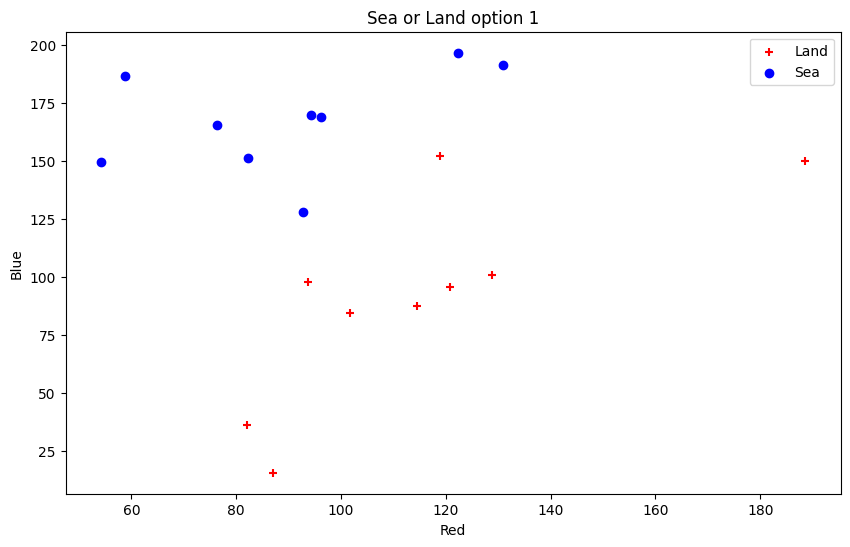

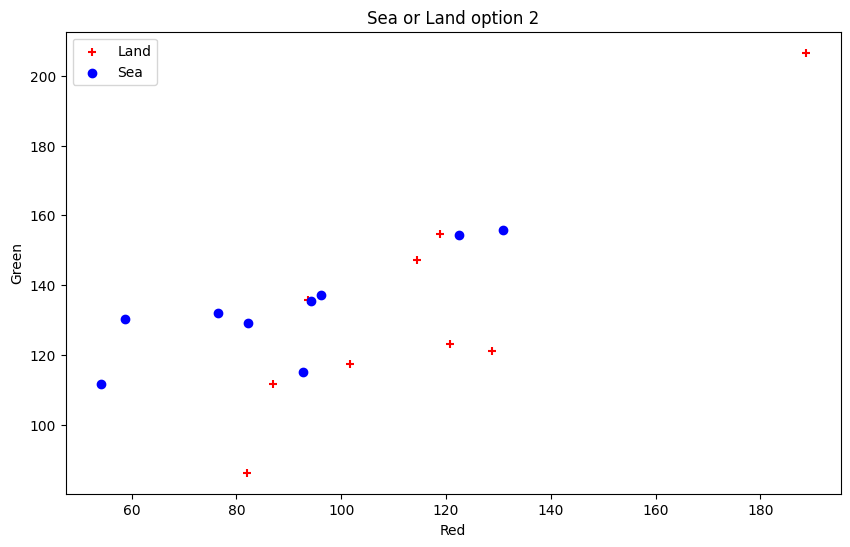

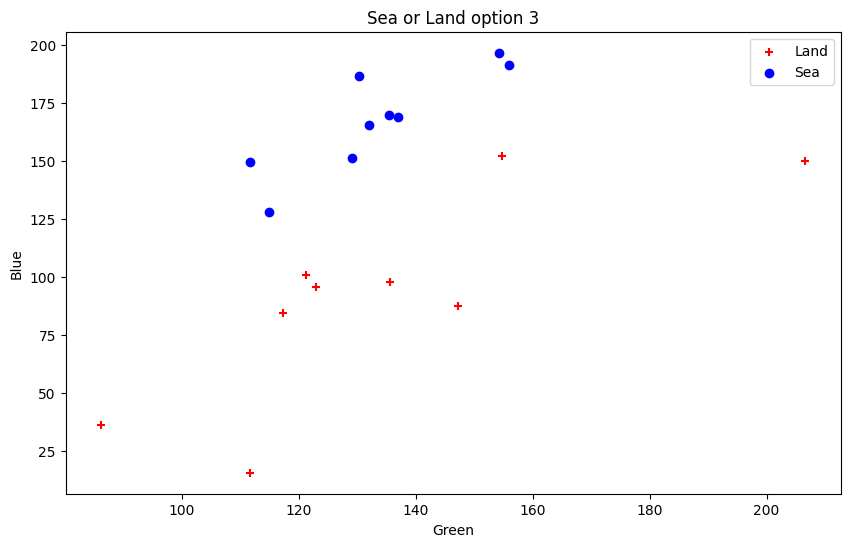

In [ ]:
land_averages = np.array(land_averages)
sea_averages = np.array(sea_averages)
land_red = land_averages[:, 0]
land_green = land_averages[:, 1]
land_blue = land_averages[:, 2]
sea_red = sea_averages[:, 0]
sea_green = sea_averages[:, 1]
sea_blue = sea_averages[:, 2]
plt.figure(figsize=(10, 6))
plt.scatter(land_red, land_blue, color='red', label='Land', marker='+')
plt.scatter(sea_red, sea_blue, color='blue', label='Sea', marker='o')
plt.title('Sea or Land option 1')
plt.xlabel('Red')
plt.ylabel('Blue')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(land_red, land_green, color='red', label='Land', marker='+')
plt.scatter(sea_red, sea_green, color='blue', label='Sea', marker='o')
plt.title('Sea or Land option 2')
plt.xlabel('Red')
plt.ylabel('Green')
plt.legend()
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(land_green, land_blue, color='red', label='Land', marker='+')
plt.scatter(sea_green, sea_blue, color='blue', label='Sea', marker='o')
plt.title('Sea or Land option 3')
plt.xlabel('Green')
plt.ylabel('Blue')
plt.legend()
plt.show()